```
Student-1
Name:Swarjit Sarkar
ID# 20-43003-1
```

```
Student-2
Name: Tripti Ahmed
ID# 20-42960-1
```



*   Mount your google drive.


In [2]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*   Import necessary libraries.



In [3]:
# load/import all required library

# start writing your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

**• Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [4]:
# write task-1 solution

# start writing your code here
train_path = '/content/drive/MyDrive/Machine/train.csv'
test_path = '/content/drive/MyDrive/Machine/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
test.head()

,23,Female,Single,Student,No Income,Graduate,2,13.0298,77.6047,560032,No,Negative,No.1
0,23,Male,Single,Student,No Income,Post Graduate,2,12.9261,77.6221,560034,Yes,Positive,Yes
1,24,Male,Single,Student,No Income,Post Graduate,5,12.9621,77.5376,560104,Yes,Positive,Yes
2,22,Female,Single,Employee,25001 to 50000,Graduate,4,12.8845,77.6036,560076,Yes,Positive,Yes
3,26,Male,Married,Employee,More than 50000,Graduate,4,12.9048,77.6821,560036,Yes,Positive,Yes
4,25,Female,Single,Student,No Income,Ph.D,3,12.9048,77.6821,560036,Yes,Positive,Yes


In [6]:
train.shape

(199, 13)

In [7]:
test.shape

(188, 13)

**• Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [8]:
# write task-2 solution

# start writing your code here
train_missing_values=train.isnull().sum()
train_missing_values

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [9]:
test_missing_values=test.isnull().sum()
test_missing_values

23           0
Female       0
Single       0
Student      0
No Income    0
Graduate     0
2            0
13.0298      0
77.6047      0
560032       0
No           0
Negative     0
No.1         0
dtype: int64

In [10]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (199, 13)
test data shape: (188, 13)


**• Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

In [11]:
# write task-3 solution

# start writing your code here
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         199 non-null    int64  
 1   Gender                      199 non-null    object 
 2   Marital Status              199 non-null    object 
 3   Occupation                  199 non-null    object 
 4   Monthly Income              199 non-null    object 
 5   Educational Qualifications  199 non-null    object 
 6   Family size                 199 non-null    int64  
 7   latitude                    199 non-null    float64
 8   longitude                   199 non-null    float64
 9   Pin code                    199 non-null    int64  
 10  Output                      199 non-null    object 
 11  Feedback                    199 non-null    object 
 12  Unnamed: 12                 199 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [12]:
def histogram(column):
  plt.viridis()
  plt.figure(figsize=(15, 20))

  for index, col in enumerate(column):
    plt.subplot((len(column) + 1) // 2, 2, index + 1)
    plt.hist(train[col],bins=10, color='red',edgecolor='white',density=True,alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.title(f'distribution of features {col}')
    plt.grid(axis='y',linestyle='--', alpha=0.7)

    # Display the plot
  plt.tight_layout(pad = 2)

  plt.show()

<Figure size 640x480 with 0 Axes>

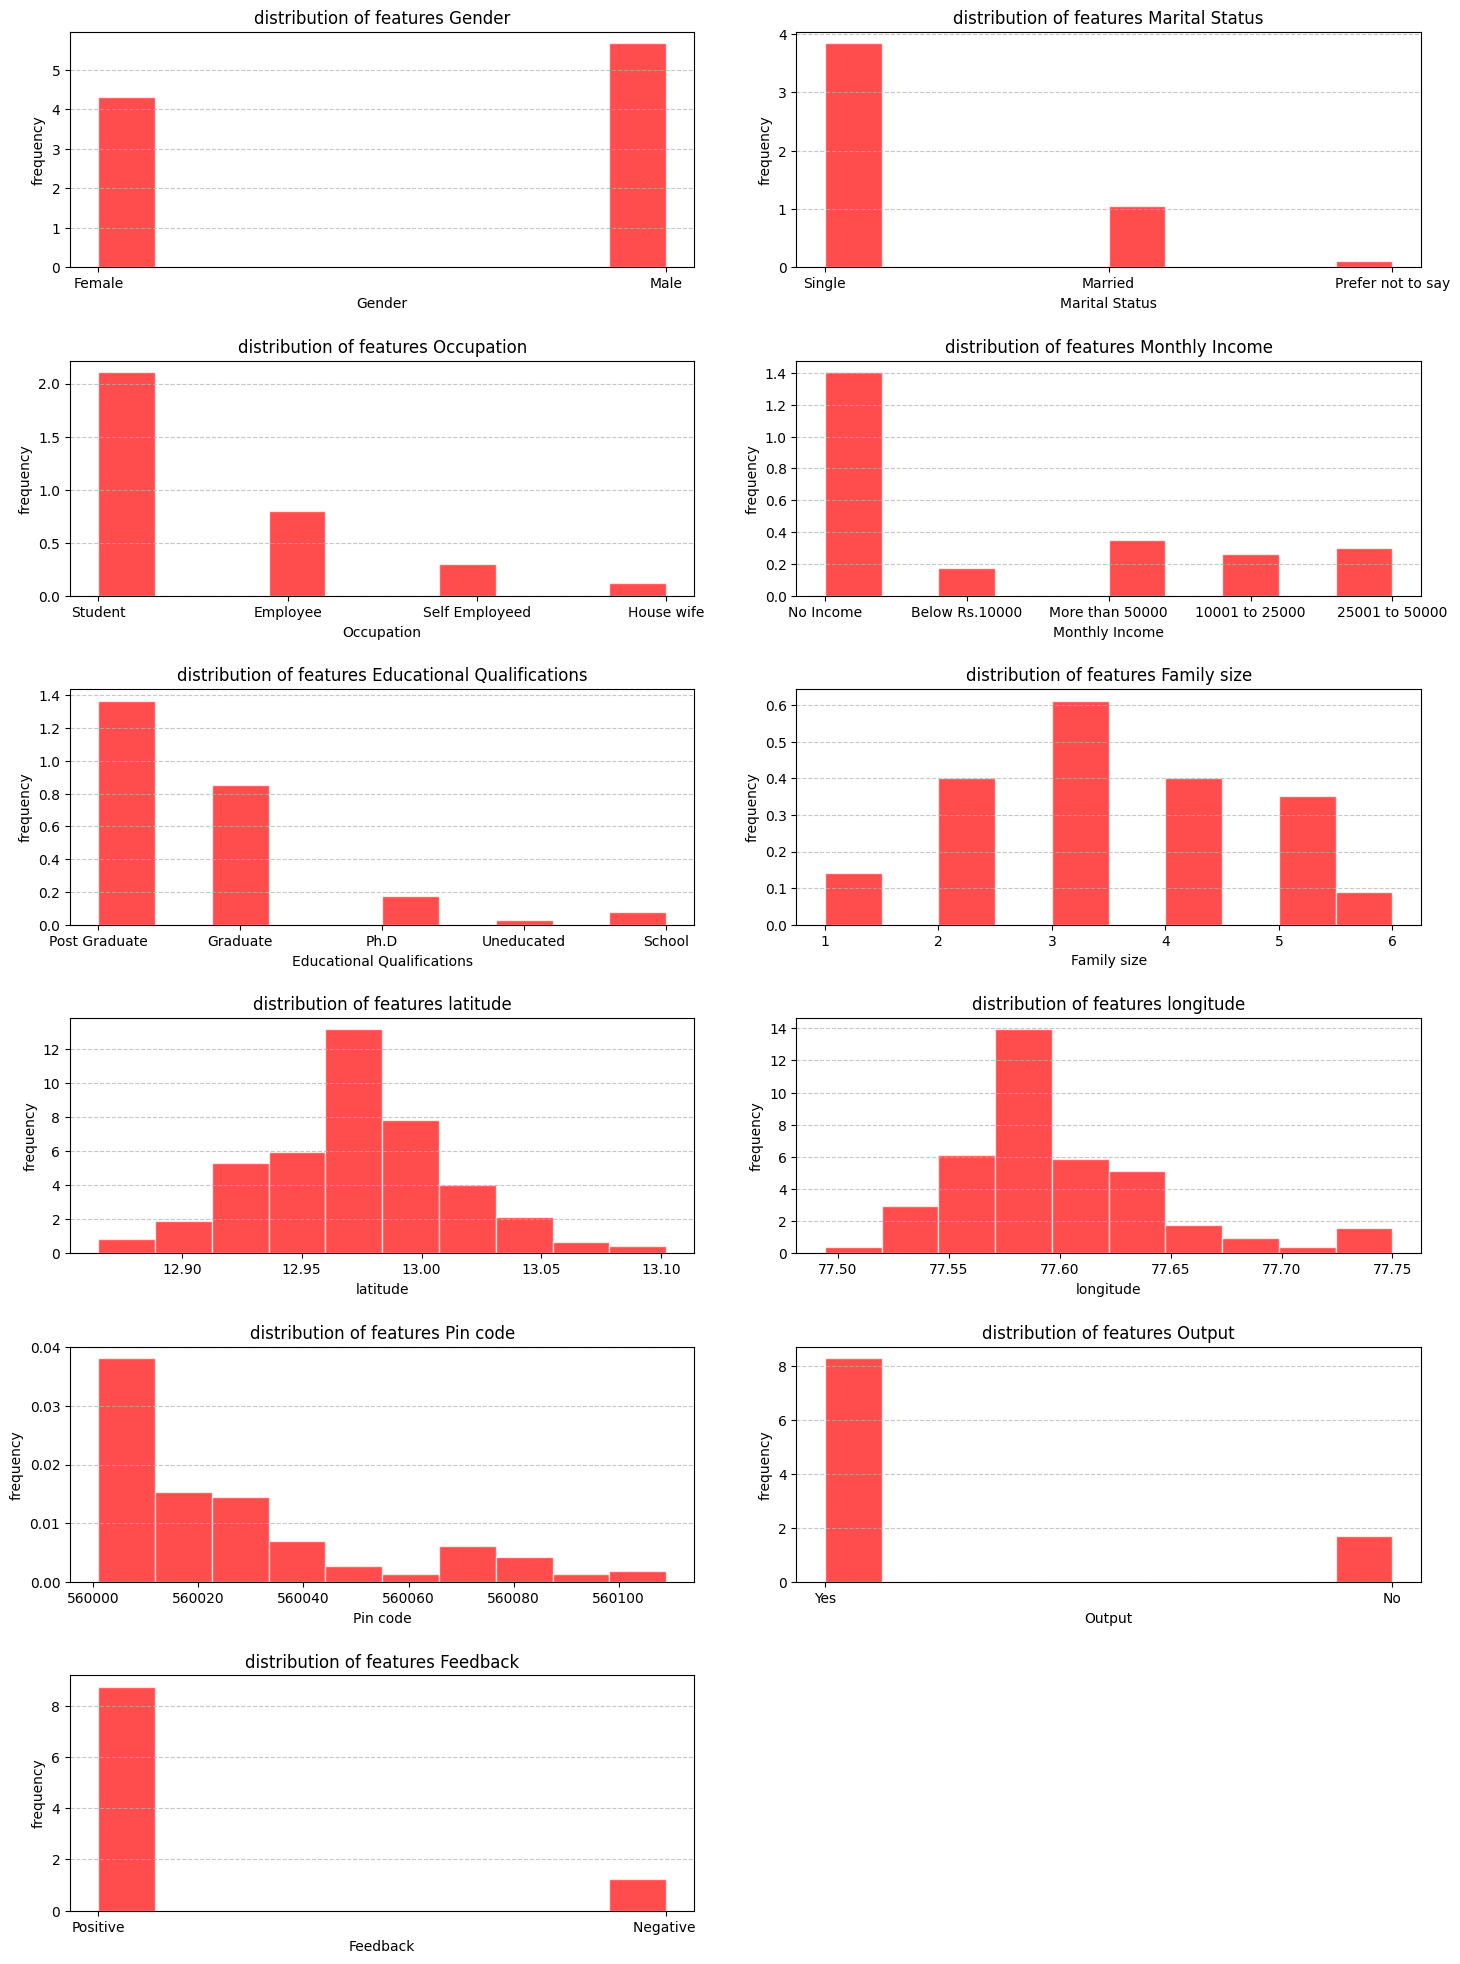

In [13]:
x = train.columns.tolist()[1:-1]
histogram(x)

**• Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

In [14]:
# write task-4 solution

# start writing your code here
def price_scatter_plot(x_axis, column_name):

    plt.figure(figsize=(15, 20))

    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1)

        plt.scatter(train[x_axis], train[col],alpha=0.5, color='b', edgecolors='k')

        plt.title(f'{col.upper()} vs. Customer', fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Customer', fontsize=14)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(pad = 2)

    plt.show()

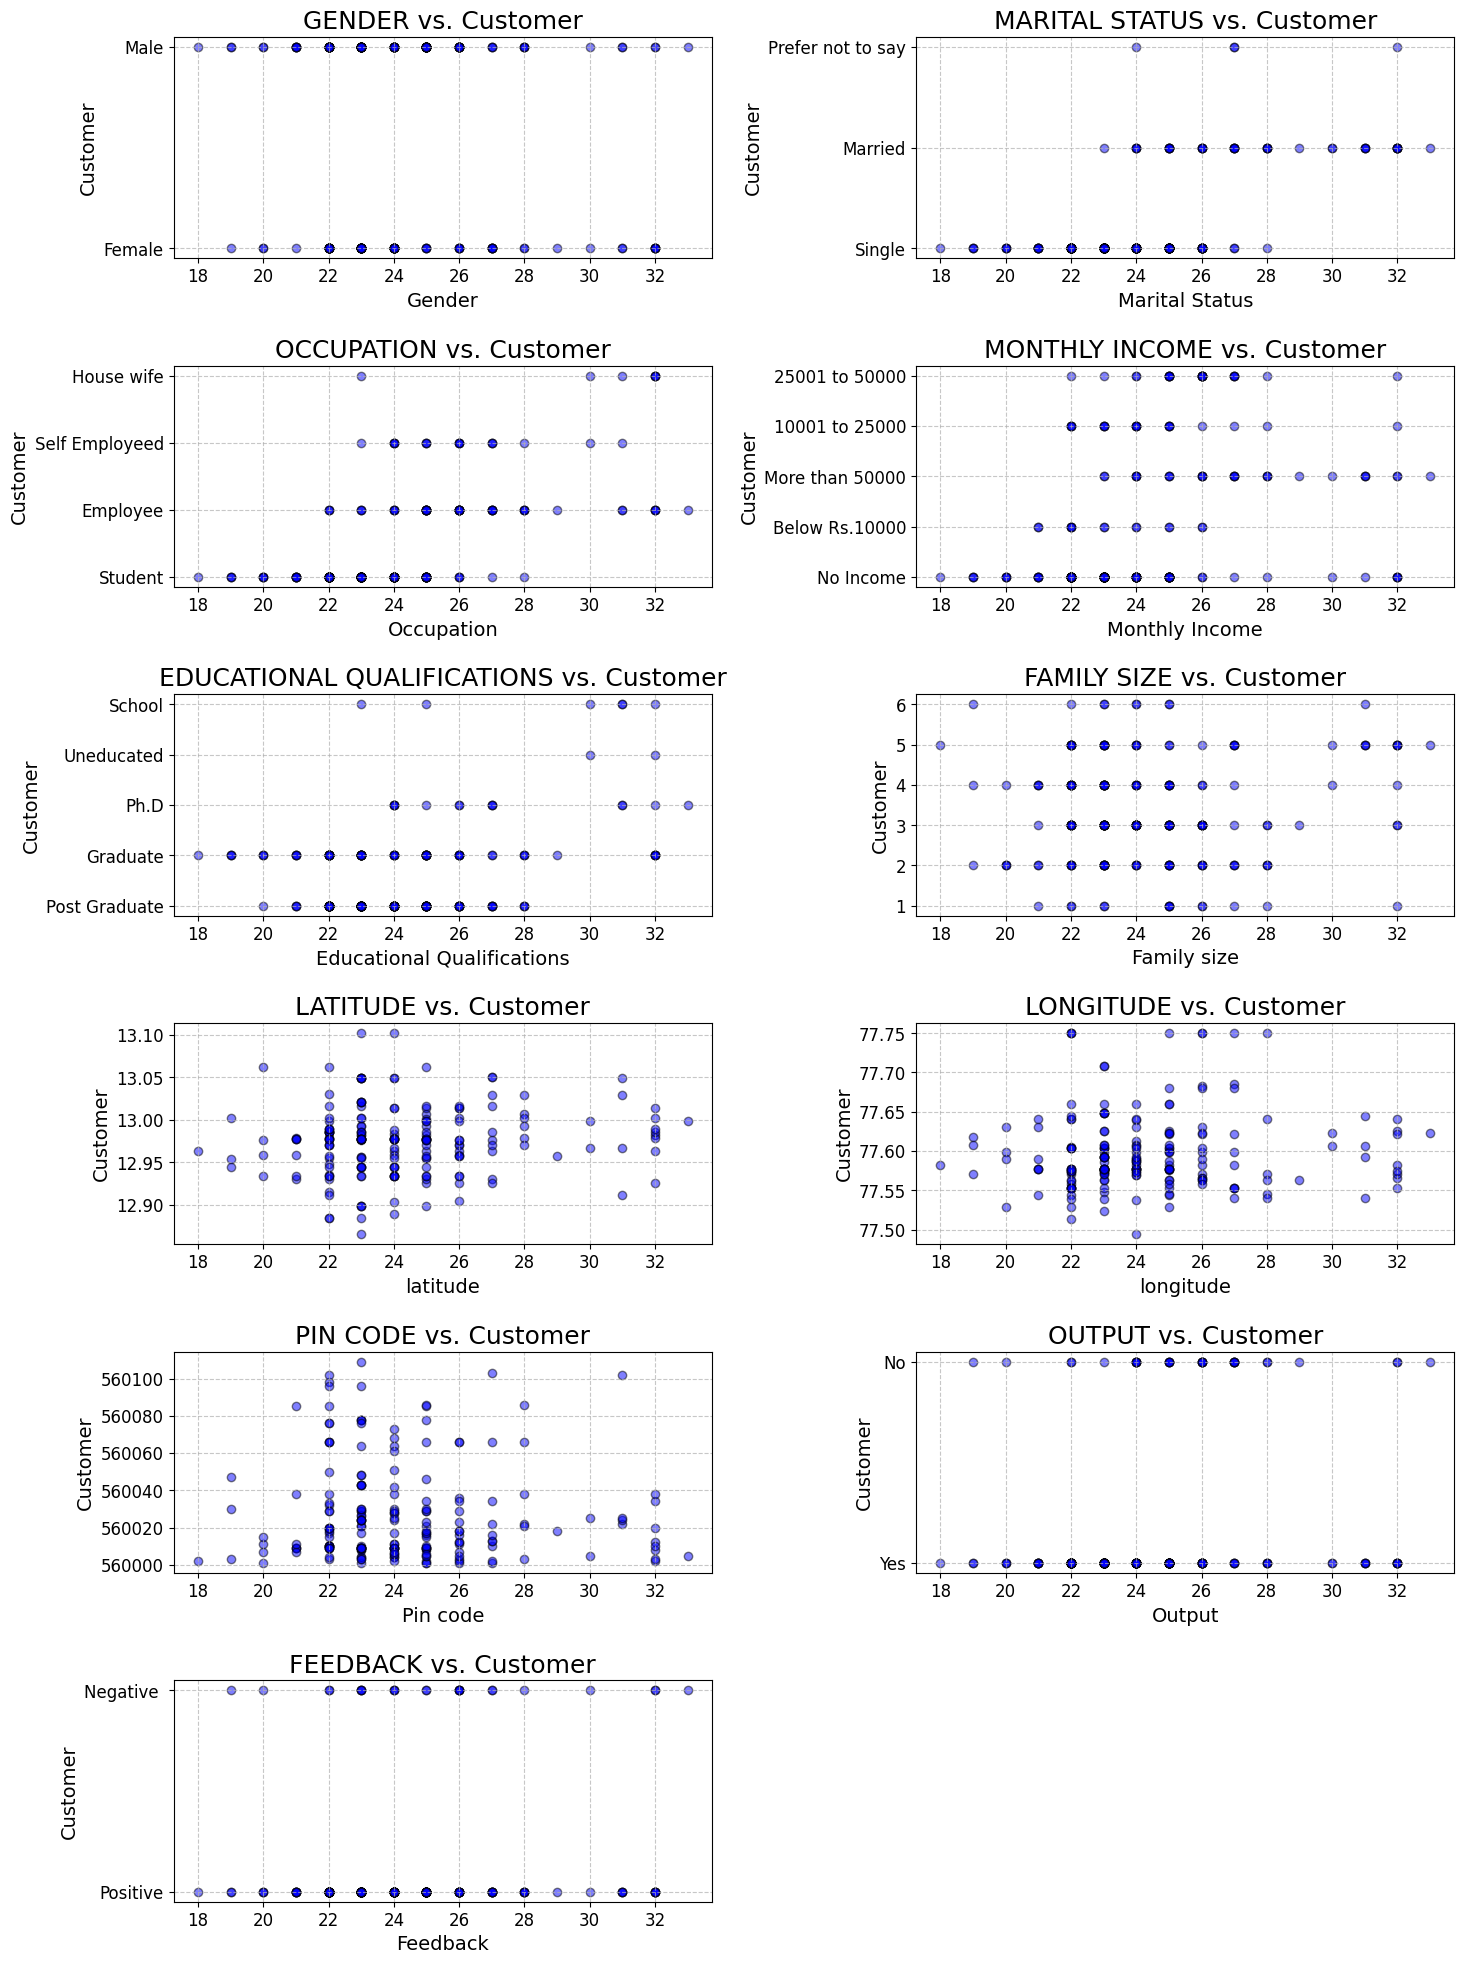

In [15]:
columns = train.columns.to_list()[1:-1]
price_scatter_plot("Age",columns)

**• Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [16]:
# write task-5 solution

# start writing your code here
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])

In [17]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12,Age,Family size,latitude,longitude,Pin code
0,0,2,3,4,2,1,1,1,20,4,12.9766,77.5993,560001
1,0,2,3,2,0,1,1,1,24,3,12.9770,77.5773,560009
2,1,2,3,2,2,1,0,1,22,3,12.9551,77.6593,560017
3,0,2,3,4,0,1,1,1,22,6,12.9473,77.5616,560019
4,1,2,3,2,2,1,1,1,22,4,12.9850,77.5533,560010


In [18]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12,Age,Family size,latitude,longitude,Pin code
0,0,2,3,4,2,1,1,1,20,4,12.9766,77.5993,560001
1,0,2,3,2,0,1,1,1,24,3,12.9770,77.5773,560009
2,1,2,3,2,2,1,0,1,22,3,12.9551,77.6593,560017
3,0,2,3,4,0,1,1,1,22,6,12.9473,77.5616,560019
4,1,2,3,2,2,1,1,1,22,4,12.9850,77.5533,560010


**• Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [19]:
# write task-6 solution

# start writing your code here
xtrain=features.drop(["Gender"],axis=1)
xtrain.shape

(199, 12)

In [20]:
ytrain=features["Gender"]
ytrain.head()
ytrain.shape

(199,)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)
x_test.shape

(50, 12)

In [22]:
y_test.shape

(50,)

In [23]:
x_train.head()

,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12,Age,Family size,latitude,longitude,Pin code
65,2,3,4,2,1,1,1,25,6,13.0012,77.5995,560046
53,2,3,4,2,1,1,1,25,2,12.9635,77.5821,560002
3,2,3,4,0,1,1,1,22,6,12.9473,77.5616,560019
198,0,1,4,3,1,1,1,23,6,12.9442,77.6076,560030
154,0,2,0,0,1,1,1,24,5,12.9579,77.6309,560007


In [24]:
y_train.head()

65     1
53     1
3      0
198    0
154    0
Name: Gender, dtype: int64

In [25]:

x_test.head()

,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12,Age,Family size,latitude,longitude,Pin code
174,2,0,2,0,1,1,1,24,2,12.9551,77.6593,560017
157,0,1,4,0,1,1,1,32,3,12.9850,77.5533,560010
162,2,0,0,0,1,1,1,25,4,13.0166,77.6804,560016
185,0,0,3,2,1,1,1,28,1,12.9925,77.5633,560021
110,2,3,4,2,1,1,1,21,4,12.9770,77.5773,560009


In [26]:

y_test.head()

174    1
157    0
162    1
185    1
110    1
Name: Gender, dtype: int64

**• Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [27]:
# write task-7 solution

# start writing your code here
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [28]:
predict=model.predict(x_test)
predict

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1])

**• Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

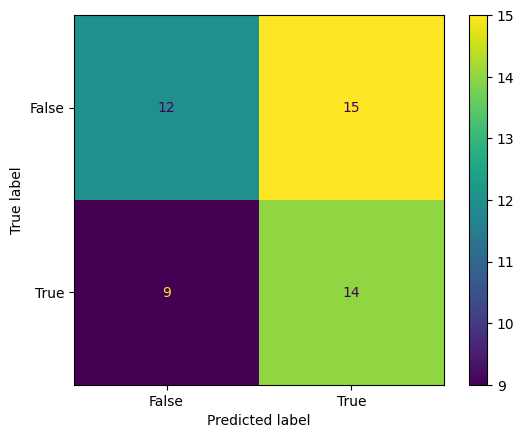

In [29]:
# write task-8 solution

# start writing your code here
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score,precision_score,f1_score
confusionMatrix = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**• Task 9:** Calculate the train and test accuracy of your model and compare them.

In [30]:
# write task-9 solution

# start writing your code here
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.52
Precision: 0.5270935960591133


**• Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [31]:
# write task-10 solution

# start writing your code here
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=10,scoring='accuracy').mean()
print(f"Cross Validation Accuracy: {scores}")

Cross Validation Accuracy: 0.5847619047619047


# New Section